<a href="https://colab.research.google.com/github/MDfarazuddin99/Face_Masked_Recognition/blob/master/Prepare_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename, quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Build Training Set

In [61]:
from IPython.display import Image
person_name = input('Enter your Name: ')
for i in range(2):
    try:
        file_name = '/content/drive/My Drive/Custom/full_images/Not_Masked/'+person_name+'/'+str(i)+'.jpg'
        filename = take_photo(file_name)
        print('Saved to {}'.format(filename))
        
    # Show the image which was just taken.
        # display(Image(filename))
    except Exception as err:
        # Errors will be thrown if the user does not have a webcam or if they do not
        # grant the page permission to access it.
        print(str(err))

Enter your Name: tauheed


<IPython.core.display.Javascript object>

Saved to /content/drive/My Drive/Custom/full_images/Not_Masked/tauheed/0.jpg


<IPython.core.display.Javascript object>

Saved to /content/drive/My Drive/Custom/full_images/Not_Masked/tauheed/1.jpg


In [0]:
path1 = '/content/drive/My Drive/Custom/full_images/Not_Masked/' + person_name+'/'
path2 =  '/content/drive/My Drive/Custom/train/' + person_name+'/' 

In [0]:
from os import listdir
from os.path import isfile, join
mypath = path1
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

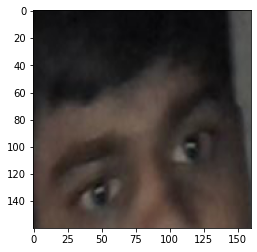

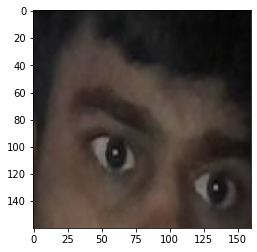

In [64]:
!pip install mtcnn
import mtcnn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # opencv
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from keras.models import load_model
from PIL import Image
import os
def extract_and_crop_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:int(0.75*y2), x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    # print(image)
    face_array = np.asarray(image)
    plt.imshow(face_array)
    plt.show()
    return face_array



for index,file_ in enumerate(onlyfiles):
    pixels = extract_and_crop_face(os.path.join(path1,file_))
    plt.imsave(path2+str(index)+'.jpg',pixels)

Build Test Set

In [65]:
from IPython.display import Image
person_name = input('Enter your Name: ')
for i in range(2):
    try:
        file_name = '/content/drive/My Drive/Custom/full_images/Masked/'+person_name+'/'+str(i)+'.jpg'
        filename = take_photo(file_name)
        print('Saved to {}'.format(filename))
        
    # Show the image which was just taken.
        # display(Image(filename))
    except Exception as err:
        # Errors will be thrown if the user does not have a webcam or if they do not
        # grant the page permission to access it.
        print(str(err))

Enter your Name: tauheed


<IPython.core.display.Javascript object>

Saved to /content/drive/My Drive/Custom/full_images/Masked/tauheed/0.jpg


<IPython.core.display.Javascript object>

Saved to /content/drive/My Drive/Custom/full_images/Masked/tauheed/1.jpg


In [0]:
path1 = '/content/drive/My Drive/Custom/full_images/Not_Masked/' + person_name+'/'
path2 =  '/content/drive/My Drive/Custom/test/' + person_name+'/' 

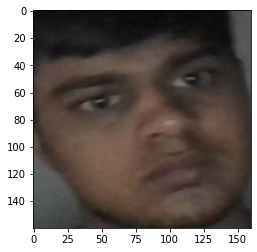

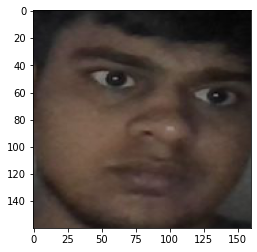

In [67]:
!pip install mtcnn
import mtcnn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # opencv
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from keras.models import load_model
from PIL import Image
import os


def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    # print(image)
    face_array = np.asarray(image)
    plt.imshow(face_array)
    plt.show()
    return face_array
    
for index,file_ in enumerate(onlyfiles):
    pixels = extract_face(os.path.join(path1,file_))
    plt.imsave(path2+str(index)+'.jpg',pixels)